**Importing Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import plotly.graph_objects as go

**Attaching CSV file**

In [ ]:
df = pd.read_csv('/content/banking_dispute_dataset_zzu.csv')

Read CSV

In [ ]:
df

,Customer ID,Customer Type,Account Type,Customer Region,Customer Loyalty Tier,Dispute ID,Dispute Type,Dispute Date,Dispute Resolution Time,Dispute Status,...,Transaction Type,Merchant ID,Transaction Location,Action Taken,Resolution Outcome,Resolution Time,Dispute Resolution Method,Customer Satisfaction Score,Feedback Comments,Communication Channels Used
0,CUS4823,New,Checking,Georgia,Silver,PIJDMT6,Service Issue,2024-04-06,3,Under Investigation,...,Online Purchase,H8YO6O,Illinois,Issue Fixed,Resolved in Favor of Bank,16,Human Intervention,1,Very Dissatisfied,Social Media
1,CUS1375,Existing,Savings,Florida,Silver,T75GRYY,Account Lock,2024-09-25,7,Pending,...,Withdrawal,HC2ERC,California,Investigation Started,Resolved in Favor of Customer,14,AI,1,Will Recommend,Phone
2,CUS2001,Existing,Checking,Texas,Platinum,J0E9RYA,Billing Error,2024-09-17,8,Under Investigation,...,Withdrawal,AET03G,Washington,Investigation Started,Resolved in Favor of Bank,21,AI,1,Neutral,In-Person
3,CUS7425,New,Savings,Florida,Platinum,MRWDLY1,Fraud,2024-01-10,4,Pending,...,Withdrawal,AEMMMY,New York,Investigation Started,Customer Compensation,26,AI,1,Could Be Better,In-Person
4,CUS2297,Existing,Savings,New York,Gold,IDERU57,Service Issue,2024-04-06,2,Under Investigation,...,Cashback,IA01MF,Ohio,Issue Fixed,Resolved in Favor of Bank,24,Human Intervention,5,Very Satisfied,Online Chat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,CUS3867,Existing,Checking,Georgia,Gold,TAVF1WE,Account Lock,2024-09-09,9,Pending,...,Cashback,8DO714,New York,Communication Sent,Customer Compensation,23,Human Intervention,1,Could Be Better,Online Chat
496,CUS5674,New,Checking,Texas,Gold,9XPF3DZ,Account Lock,2024-11-18,11,Pending,...,Deposit,3VHE8P,Florida,Refund Issued,Resolved in Favor of Customer,1,AI,5,Could Be Better,Email
497,CUS3808,New,Checking,Washington,Silver,IGSH70S,Transaction Error,2024-08-06,5,Resolved,...,Deposit,7KK0KC,Florida,Issue Fixed,Resolved in Favor of Customer,7,Hybrid,4,Very Satisfied,Social Media
498,CUS9638,Existing,Savings,Texas,Platinum,HNXGV9W,Account Lock,2024-03-13,10,Under Investigation,...,Online Purchase,760O81,New York,Compensation Provided,Resolved in Favor of Customer,6,Human Intervention,4,Very Dissatisfied,Email


Read CSV Head

In [ ]:
df.head()

,Customer ID,Customer Type,Account Type,Customer Region,Customer Loyalty Tier,Dispute ID,Dispute Type,Dispute Date,Dispute Resolution Time,Dispute Status,...,Transaction Type,Merchant ID,Transaction Location,Action Taken,Resolution Outcome,Resolution Time,Dispute Resolution Method,Customer Satisfaction Score,Feedback Comments,Communication Channels Used
0,CUS4823,New,Checking,Georgia,Silver,PIJDMT6,Service Issue,2024-04-06,3,Under Investigation,...,Online Purchase,H8YO6O,Illinois,Issue Fixed,Resolved in Favor of Bank,16,Human Intervention,1,Very Dissatisfied,Social Media
1,CUS1375,Existing,Savings,Florida,Silver,T75GRYY,Account Lock,2024-09-25,7,Pending,...,Withdrawal,HC2ERC,California,Investigation Started,Resolved in Favor of Customer,14,AI,1,Will Recommend,Phone
2,CUS2001,Existing,Checking,Texas,Platinum,J0E9RYA,Billing Error,2024-09-17,8,Under Investigation,...,Withdrawal,AET03G,Washington,Investigation Started,Resolved in Favor of Bank,21,AI,1,Neutral,In-Person
3,CUS7425,New,Savings,Florida,Platinum,MRWDLY1,Fraud,2024-01-10,4,Pending,...,Withdrawal,AEMMMY,New York,Investigation Started,Customer Compensation,26,AI,1,Could Be Better,In-Person
4,CUS2297,Existing,Savings,New York,Gold,IDERU57,Service Issue,2024-04-06,2,Under Investigation,...,Cashback,IA01MF,Ohio,Issue Fixed,Resolved in Favor of Bank,24,Human Intervention,5,Very Satisfied,Online Chat


Read CSV Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  500 non-null    object 
 1   Customer Type                500 non-null    object 
 2   Account Type                 500 non-null    object 
 3   Customer Region              500 non-null    object 
 4   Customer Loyalty Tier        500 non-null    object 
 5   Dispute ID                   500 non-null    object 
 6   Dispute Type                 500 non-null    object 
 7   Dispute Date                 500 non-null    object 
 8   Dispute Resolution Time      500 non-null    int64  
 9   Dispute Status               500 non-null    object 
 10  Dispute Priority             500 non-null    object 
 11  Transaction ID               500 non-null    int64  
 12  Transaction Date             500 non-null    object 
 13  Transaction Amount  

In [ ]:
df.describe()

,Dispute Resolution Time,Transaction ID,Transaction Amount,Resolution Time,Customer Satisfaction Score
count,500.000000,5.000000e+02,500.000000,500.000000,500.000000
mean,8.070000,4.816924e+07,1553.721380,15.428000,2.920000
std,3.716008,2.860523e+07,867.494565,8.616339,1.441442
min,2.000000,1.003470e+05,51.540000,1.000000,1.000000
25%,5.000000,2.380802e+07,761.440000,8.000000,2.000000
50%,8.000000,4.625698e+07,1599.900000,15.000000,3.000000
75%,11.000000,7.221686e+07,2330.160000,24.000000,4.000000
max,14.000000,9.989582e+07,2997.680000,30.000000,5.000000


In [ ]:
# Calculate the value counts for 'Dispute Resolution Method'
dispute_resolution_counts = df['Dispute Resolution Method'].value_counts().reset_index()
dispute_resolution_counts.columns = ['Dispute Resolution Method', 'Count']

# Create the pie chart using plotly
fig = px.pie(dispute_resolution_counts,
             names='Dispute Resolution Method',
             values='Count',
             title='Dispute Resolution Method Distribution')
fig.show()

In [ ]:
# Assuming df contains 'Dispute Type' column
dispute_type_counts = df['Dispute Type'].value_counts().reset_index()
dispute_type_counts.columns = ['Dispute Type', 'Count']

# Create Pie Chart
fig = px.pie(dispute_type_counts, names='Dispute Type', values='Count', title="Dispute Type Distribution")
fig.show()

In [ ]:
# Calculate the value counts for 'Customer Satisfaction Score'
satisfaction_counts = df['Customer Satisfaction Score'].value_counts().reset_index()
satisfaction_counts.columns = ['Customer Satisfaction Score', 'Count']

# Create the pie chart using plotly
fig = px.pie(satisfaction_counts,
             names='Customer Satisfaction Score',
             values='Count',
             title='Customer Satisfaction Score Distribution')
fig.show()

In [ ]:
# 1. Bar Chart: Dispute Type Distribution
dispute_counts = df['Dispute Type'].value_counts().reset_index()
dispute_counts.columns = ['Dispute Type', 'Number of Disputes']

fig1 = px.bar(dispute_counts,
             x='Dispute Type',
             y='Number of Disputes',
             title='Dispute Type Distribution',
             labels={'Dispute Type': 'Dispute Type', 'Number of Disputes': 'Number of Disputes'})
fig1.show()

# 2. Bar Chart: Customer Satisfaction by Dispute Type
satisfaction_by_type = df.groupby('Dispute Type')['Customer Satisfaction Score'].mean().reset_index()

fig2 = px.bar(satisfaction_by_type,
             x='Dispute Type',
             y='Customer Satisfaction Score',
             title='Average Customer Satisfaction by Dispute Type',
             labels={'Dispute Type': 'Dispute Type', 'Customer Satisfaction Score': 'Average Satisfaction Score'})
fig2.show()

# 3. Bar Chart: Dispute Resolution Efficiency (AI vs. Manual)
resolution_counts = df.groupby('Dispute Resolution Method')['Dispute Type'].count().reset_index()
resolution_counts.columns = ['Dispute Resolution Method', 'Number of Disputes']


fig3 = px.bar(resolution_counts,
             x='Dispute Resolution Method',
             y='Number of Disputes',
             title='Dispute Resolution Efficiency (AI vs Manual)',
             labels={'Dispute Resolution Method': 'Resolution Method', 'Number of Disputes': 'Number of Disputes'})
fig3.show()

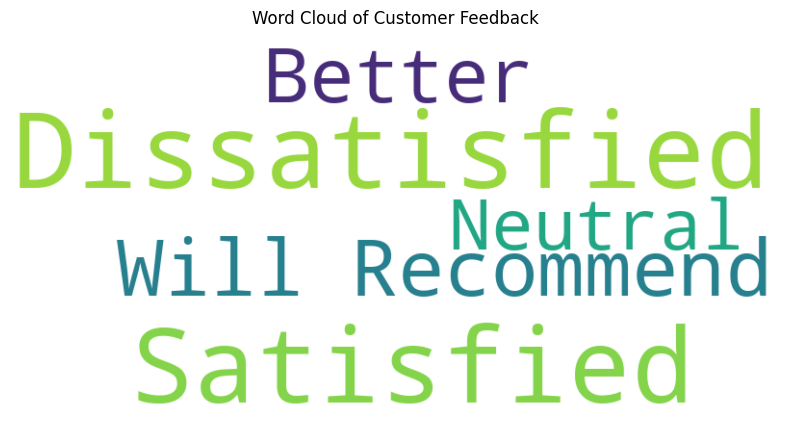

In [ ]:
# Assuming your DataFrame is named 'df' and the column with feedback is 'Customer Feedback'

# Combine all feedback text into a single string
text = ' '.join(df['Feedback Comments'].astype(str).tolist())


# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axes
plt.title('Word Cloud of Customer Feedback')
plt.show()

In [ ]:
# Ensure 'Dispute Date' is in datetime format
df['Dispute Date'] = pd.to_datetime(df['Dispute Date'])

# Extract the year and month from 'Dispute Date' for aggregation
df['Year-Month'] = df['Dispute Date'].dt.to_period('M')

# Convert 'Year-Month' to string
df['Year-Month'] = df['Year-Month'].astype(str)

# Group by 'Year-Month' and calculate the average resolution time for each month
monthly_resolution_time = df.groupby('Year-Month')['Dispute Resolution Time'].mean().reset_index()

# Create the line chart
fig = px.line(monthly_resolution_time,
              x='Year-Month',  # X-axis represents the Year-Month
              y='Dispute Resolution Time',  # Y-axis represents the Average Dispute Resolution Time
              title="Line Chart: Dispute Resolution Time Over Time",  # Title of the chart
              labels={'Year-Month': 'Month/Year', 'Dispute Resolution Time': 'Average Dispute Resolution Time'},  # Axis labels
              markers=True)  # Show markers on the line for each data point

# Show the line chart
fig.show()

In [ ]:
fig = px.histogram(df, x="Dispute Resolution Time", title="Dispute Resolution Time")
fig.show()

In [ ]:
# Create a stacked bar chart
fig = px.bar(df,
             x='Customer Region',  # X-axis represents the Customer Region
             color='Dispute Resolution Method',  # Stack bars based on Dispute Resolution Method
             title="Stacked Bar Chart: Dispute Resolution Method by Customer Region",  # Title of the chart
             labels={'Customer Region': 'Customer Region', 'Dispute Resolution Method': 'Dispute Resolution Method'},  # Axis labels
             category_orders={'Dispute Resolution Method': ['AI', 'Manual', 'Other']},  # Optional: custom order for the resolution methods
             barmode='stack',  # Stack the bars on top of each other
             hover_data=['Customer Region', 'Dispute Resolution Method'])  # Data to show on hover

# Show the stacked bar chart
fig.show()

In [ ]:
# Create the treemap

fig = px.treemap(df,
                 path=['Transaction Type', 'Merchant ID'],  # Defining hierarchy
                 title="Treemap: Transaction Type by Merchant ID",  # Title of the plot
                 color='Merchant ID',  # Coloring boxes based on Merchant ID
                 hover_data=['Transaction Type', 'Merchant ID'])  # Data shown when hovering

# Show the plot
fig.show()

In [ ]:
# Create a Gantt chart (example with start/end times for each dispute stage)
df_gantt = pd.DataFrame([
    dict(Task="Received", Start="2025-02-01", Finish="2025-02-03"),
    dict(Task="In Progress", Start="2025-02-03", Finish="2025-02-06"),
    dict(Task="Resolved", Start="2025-02-06", Finish="2025-02-07"),
])

fig = px.timeline(df_gantt, x_start="Start", x_end="Finish", y="Task", title="Dispute Resolution Process Timeline")
fig.update_yaxes(categoryorder="total ascending")
fig.show()


In [ ]:
# Define the nodes and links for Sankey diagram
labels = ['Dispute Received', 'AI Handling', 'Manual Handling', 'Resolved', 'Escalated', 'Unresolved']
source = [0, 0, 1, 1, 2]
target = [1, 2, 3, 4, 5]
value = [10, 5, 3, 6, 2]

# Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
))

fig.update_layout(title_text="Sankey Diagram: Dispute Resolution Flow", font_size=10)
fig.show()

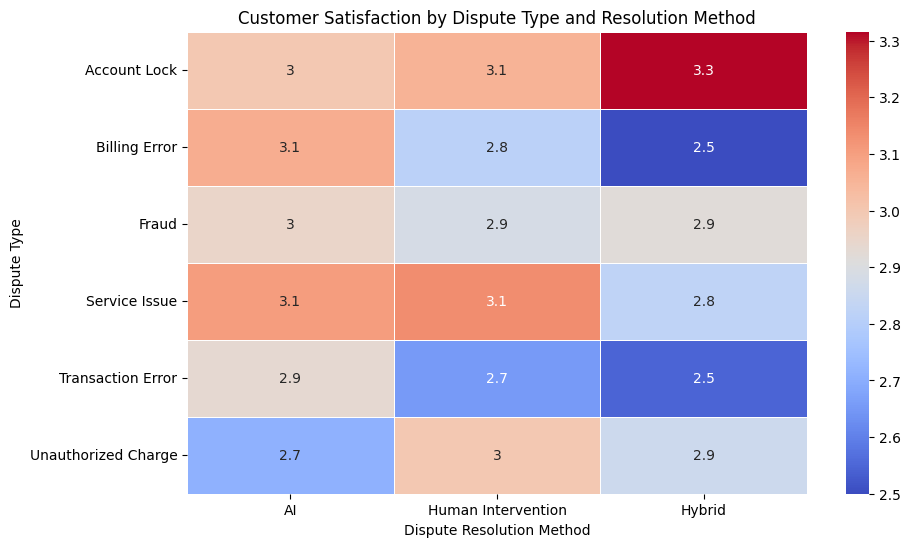

In [ ]:
# Assuming 'Dispute Type', 'Dispute Resolution Method', and 'Customer Satisfaction Score' columns exist
heatmap_data = df.pivot_table(index='Dispute Type', columns='Dispute Resolution Method', values='Customer Satisfaction Score', aggfunc='mean')

# Create Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Customer Satisfaction by Dispute Type and Resolution Method')
plt.show()

In [ ]:
# Calculate the count of disputes for each action taken
action_satisfaction_df = df.groupby(['Action Taken', 'Customer Satisfaction Score']).size().reset_index(name='Number of Disputes')

# Create the bubble chart
fig = px.scatter(action_satisfaction_df,
                 x='Action Taken',  # X-axis represents the Action Taken
                 y='Customer Satisfaction Score',  # Y-axis represents the Customer Satisfaction Score
                 size='Number of Disputes',  # Bubble size based on the number of disputes
                 color='Customer Satisfaction Score',  # Color bubbles based on Customer Satisfaction Score
                 title="Bubble Chart: Customer Satisfaction vs Action Taken",  # Title of the chart
                 hover_name='Action Taken',  # Show the action taken when hovering
                 hover_data=['Customer Satisfaction Score', 'Number of Disputes'],  # Data to show on hover
                 labels={"Action Taken": "Action Taken", "Customer Satisfaction Score": "Customer Satisfaction Score", "Number of Disputes": "Number of Disputes"})

# Show the bubble chart
fig.show()

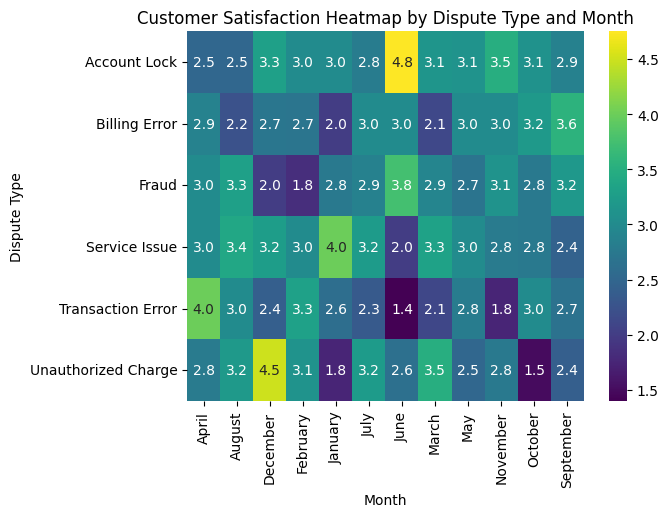

In [ ]:
df['Dispute Date'] = pd.to_datetime(df['Dispute Date']).dt.month_name()

heatmap_data = pd.pivot_table(df, values='Customer Satisfaction Score',
                     index=['Dispute Type'],
                     columns=['Dispute Date'],
                     aggfunc='mean')

sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".1f")
plt.title('Customer Satisfaction Heatmap by Dispute Type and Month')
plt.xlabel('Month')
plt.ylabel('Dispute Type')
plt.show()

In [ ]:
fig = px.scatter(df,
                 x='Resolution Time',
                 y='Dispute Resolution Time',
                 title='Resolution Time vs Dispute Resolution Time',
                 labels={'Resolution Time': 'Resolution Time', 'Dispute Resolution Time': 'Dispute Resolution Time'},
                 )
fig.show()

In [ ]:
# Group by dispute status to count the number of disputes in each stage
dispute_stage_df = df.groupby('Dispute Status').size().reset_index(name='Number of Disputes')

# Sort the stages in order of the dispute process (e.g., "Received", "In Progress", "Resolved")
stage_order = ['Received', 'In Progress', 'Resolved', 'Closed']  # Example stages
dispute_stage_df['Dispute Status'] = pd.Categorical(dispute_stage_df['Dispute Status'], categories=stage_order, ordered=True)

# Create the funnel chart
fig = px.funnel(dispute_stage_df,
                x='Number of Disputes',  # Number of disputes in each stage
                y='Dispute Status',  # Stages of the dispute process
                title="Funnel Chart: Dispute Process Flow",  # Title of the chart
                labels={'Number of Disputes': 'Number of Disputes', 'Dispute Status': 'Dispute Status'})  # Labels

# Show the funnel chart
fig.show()

In [ ]:
# Assuming df has 'Dispute Type' and 'Dispute Resolution Time' columns
avg_resolution_time = df.groupby('Dispute Type')['Dispute Resolution Time'].mean().reset_index()

# Create Bar Chart
fig = px.bar(avg_resolution_time, x='Dispute Type', y='Dispute Resolution Time', title="Average Dispute Resolution Time by Dispute Type")
fig.show()
